<a href="https://colab.research.google.com/github/RMoulla/Modelisation_Statistique/blob/main/Visualisation_des_Donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualisation des données avec R**

In [ ]:
dataset <- read.csv("customer_churn.csv")
head(dataset)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
1,Cameron Williams,42,11066.80,0,7.22,8,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
2,Kevin Mueller,41,11916.22,0,6.50,11,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 17756",Wilson PLC,1
3,Eric Lozano,38,12884.75,0,6.67,12,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
4,Phillip White,42,8010.76,0,6.71,10,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
5,Cynthia Norton,37,9191.58,0,5.56,9,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
6,Jessica Williams,48,10356.02,0,5.12,8,2009-03-03 23:13:37,"6187 Olson Mountains East Vincentborough, PR 74359",Kelly-Warren,1


In [ ]:
library(ggplot2)

### Visualiser la variable Churn

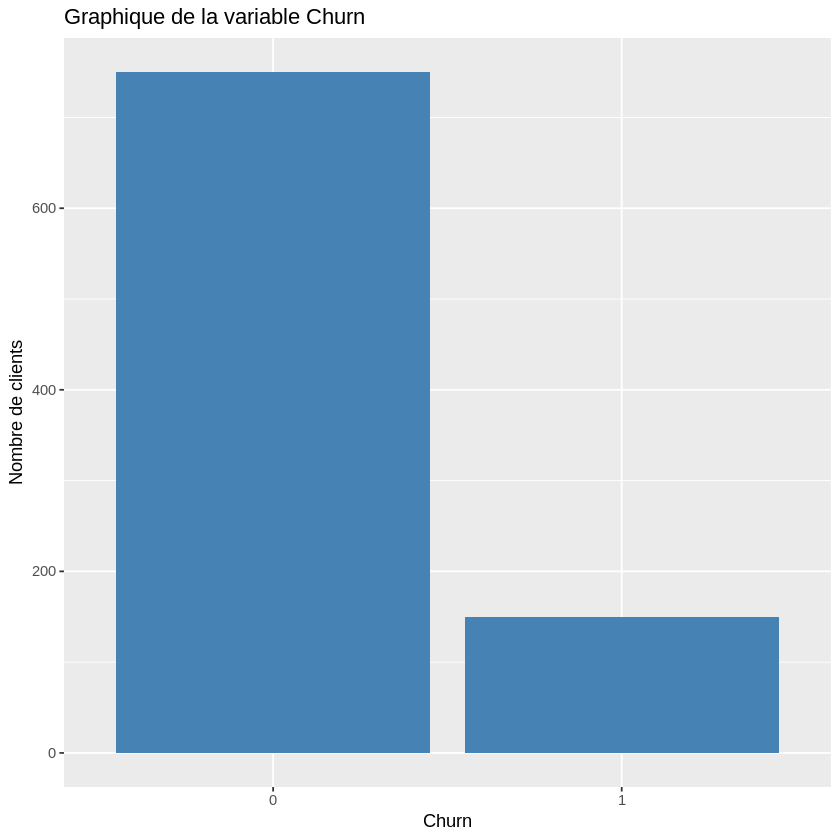

In [ ]:
ggplot(dataset, aes(x = factor(Churn))) + geom_bar(fill = "Steelblue") + labs(title = "Graphique de la variable Churn", x = "Churn", y = "Nombre de clients")

### Visualiser le churn en fonction de l'âge

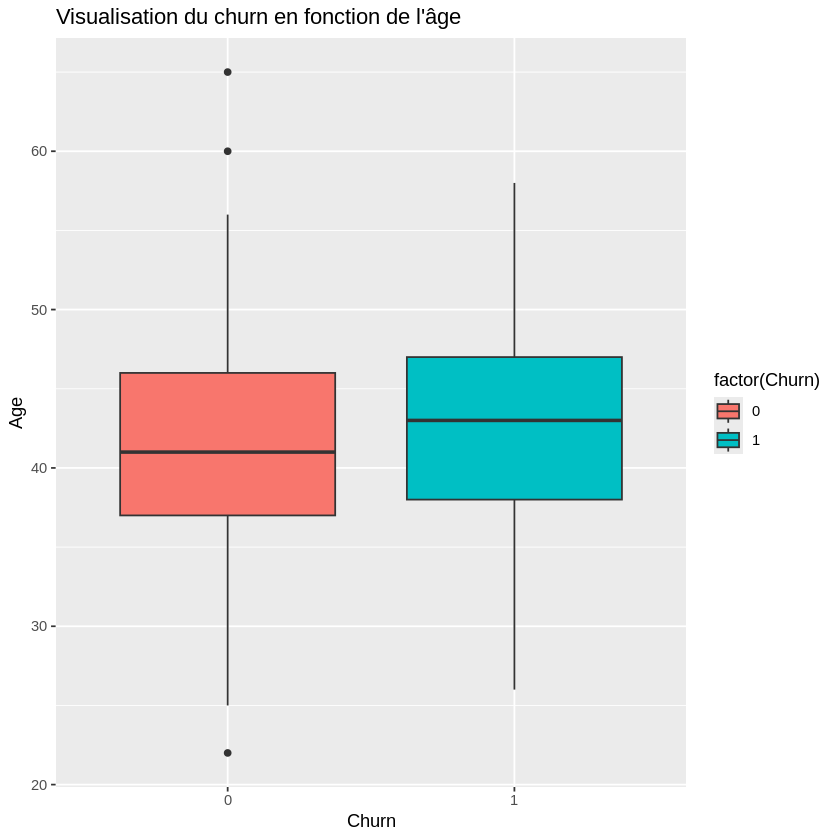

In [ ]:
ggplot(dataset, aes(x = factor(Churn), y = Age, fill = factor(Churn))) + geom_boxplot() + labs(title = "Visualisation du churn en fonction de l'âge", x = "Churn")

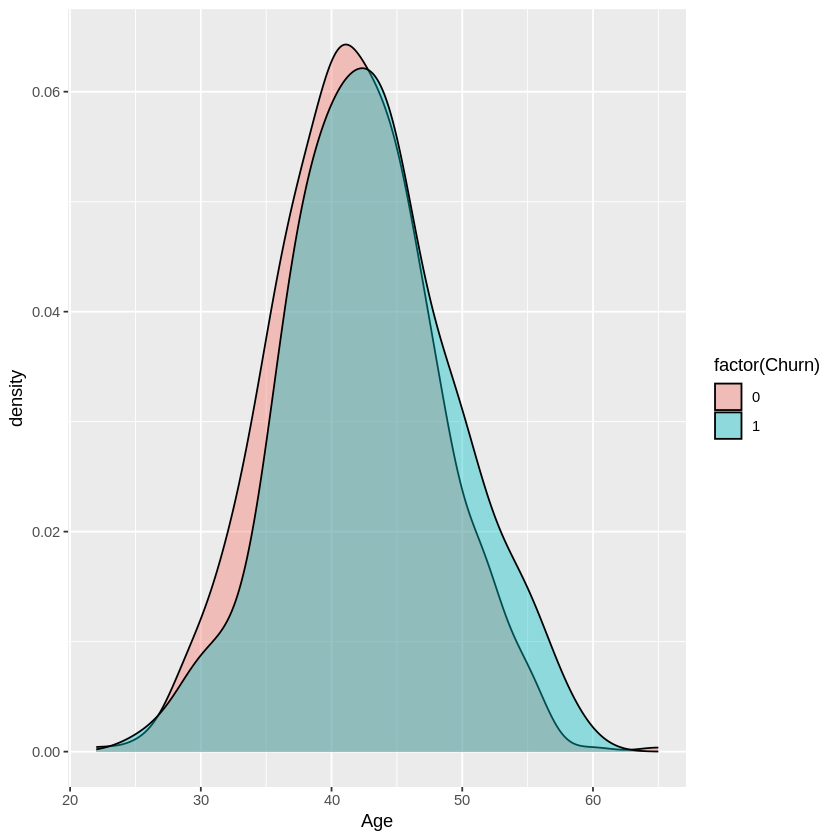

In [ ]:
ggplot(dataset, aes(x = Age, fill = factor(Churn))) + geom_density(alpha = 0.4) + labs(title = "Visualisation du churn en fonction de l'âge en densité")

### Visualiser le churn en fonction de la variable Account Manager

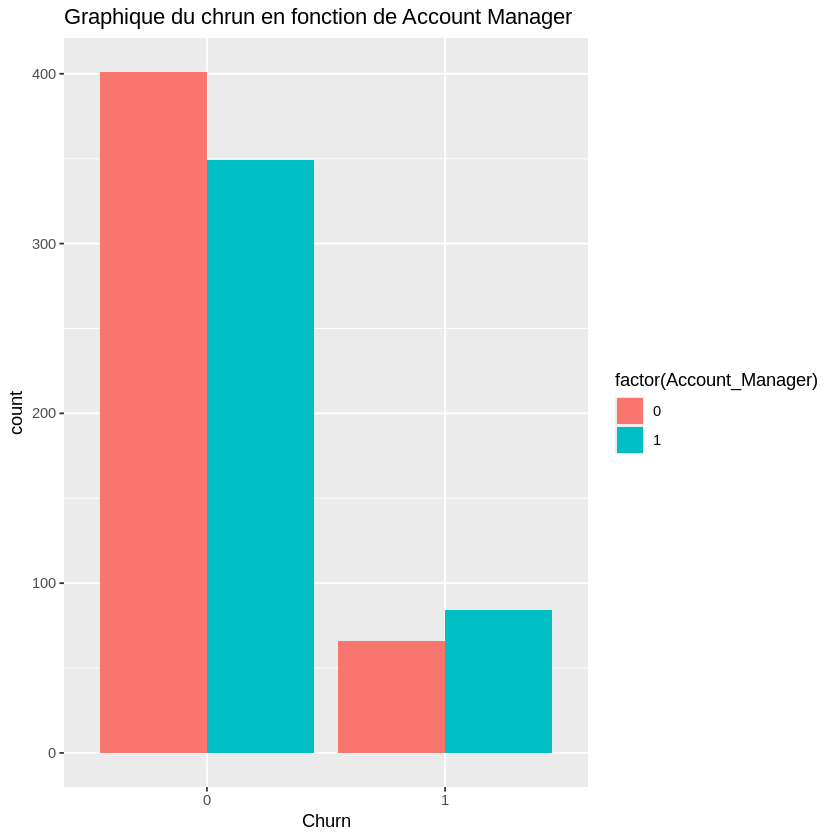

In [ ]:
ggplot(dataset, aes(x = factor(Churn), fill = factor(Account_Manager))) + geom_bar(position = "dodge") + labs(title = "Graphique du chrun en fonction de Account Manager", x = "Churn")

### Visualiser l'âge en fonction de Total Purchase

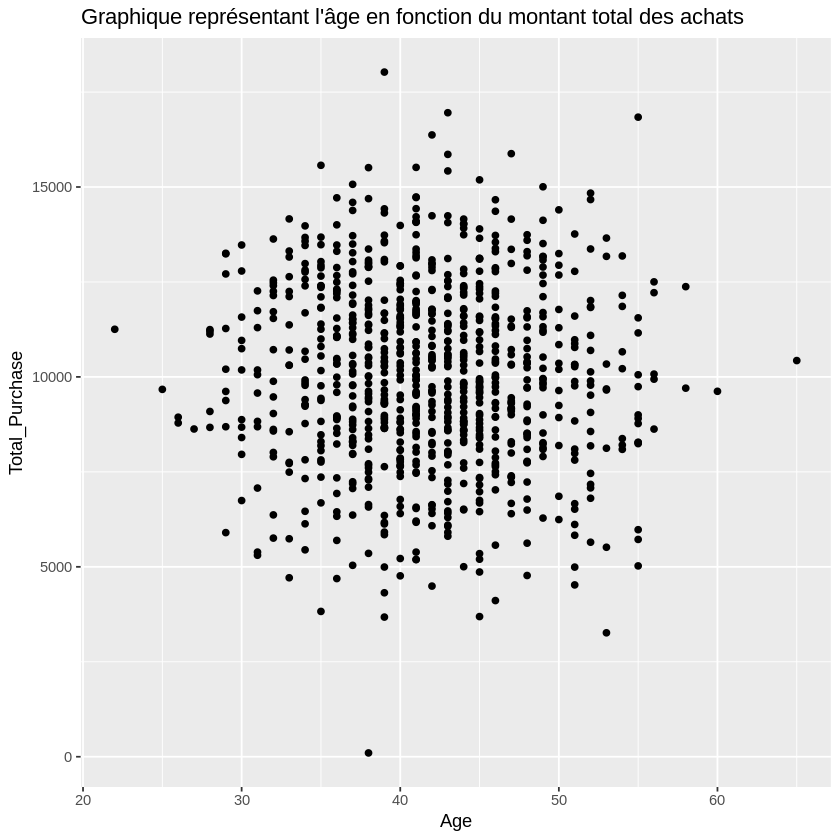

In [ ]:
ggplot(dataset, aes(x = Age, y = Total_Purchase)) + geom_point() + labs(title = "Graphique représentant l'âge en fonction du montant total des achats")

### Test d'hypothèse sur Total_Purchase et les modalités de Churn

On souhaite tester si les clients ayant churné ont une moyenne de `Total_Purchase` différente de ceux qui sont restés.

#### Hypothèses

- H₀ : μ_churn = μ_non_churn  
  Il n'y a pas de différence entre les moyennes de `Total_Purchase` selon le statut de churn.

- H₁ : μ_churn ≠ μ_non_churn  
  Il existe une différence entre les deux moyennes.



In [ ]:
t.test(Total_Purchase ~ Churn, data = dataset)


	Welch Two Sample t-test

data:  Total_Purchase by Churn
t = -0.75154, df = 222.09, p-value = 0.4531
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -562.2686  251.8144
sample estimates:
mean in group 0 mean in group 1 
       10036.95        10192.18 


La p-value est nettement supérieure au seuil 0.05. On rejette donc l'hypothèse nulle.

In [ ]:
dataset_churn = dataset[dataset$Churn == 1,]
dataset_nonchurn = dataset[dataset$Churn == 0,]